In [1]:
# Import the class
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### Drawing a Map Background

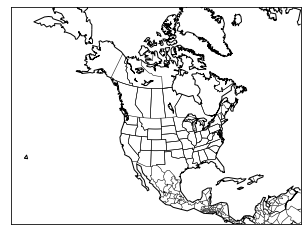

In [12]:
# Create basemap class instance, specify the projection and region
m = Basemap(projection='lcc', lon_0=-107, lat_0=50, width=12000000,height=9000000)
# draw coastlines, rivers and political boundaries 
m.drawcountries()
m.drawcoastlines()
m.drawstates()

Basemap provides 24 different map projections to represent the curved surface of the earth on a two-dimensional map.
There are two basic ways to limit the region to display. One is to provide the latitude and longitude values of each of the four corners of the rectangular map projection region. The other is to provide the lat/lon value of the center of the map projection region along with the width and height of the region in map projection coordinates.

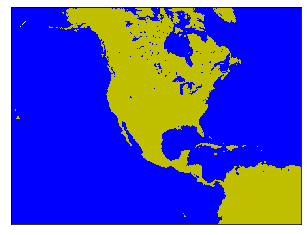

In [9]:
# draw a land-sea mask image
m.drawlsmask(land_color='y', ocean_color='b', lakes=True) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


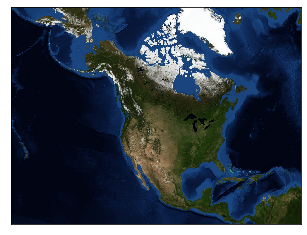

In [13]:
# draw a NASA Blue Marble image as a map background
m.bluemarble()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


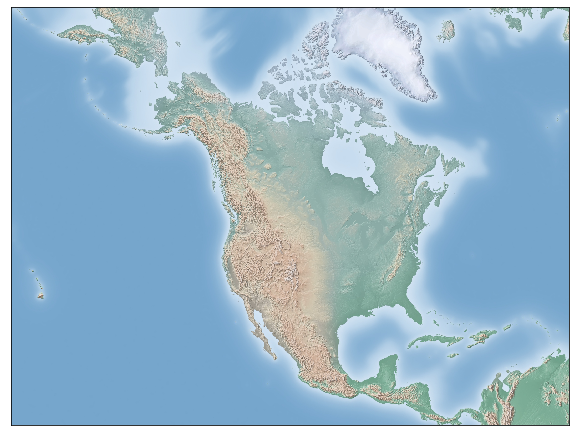

In [20]:
# Draw a shaded relief image
m.shadedrelief()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


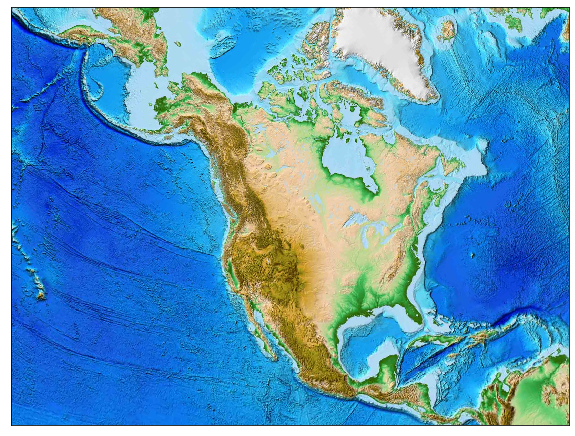

In [21]:
# Draw an etopo relief image
m.etopo()

### Drawing and Labelling Parallels and Meridians

{150.0: ([<matplotlib.lines.Line2D at 0xeba5588>],
  [Text(-120000.0, 8676000.0, '150°E')]),
 170.0: ([<matplotlib.lines.Line2D at 0xeba5668>],
  [Text(-120000.0, 6867000.0, '170°E')]),
 190.0: ([<matplotlib.lines.Line2D at 0xebaa198>],
  [Text(-120000.0, 4500000.0, '170°W')]),
 210.0: ([<matplotlib.lines.Line2D at 0xebaa4a8>],
  [Text(-120000.0, 594000.0, '150°W')]),
 230.0: ([<matplotlib.lines.Line2D at 0xebaa7b8>],
  [Text(2880000.0, -120000.0, '130°W')]),
 250.0: ([<matplotlib.lines.Line2D at 0xebaaac8>],
  [Text(5616000.0, -120000.0, '110°W')]),
 270.0: ([<matplotlib.lines.Line2D at 0xebaadd8>],
  [Text(8280000.0, -120000.0, '90°W')]),
 290.0: ([<matplotlib.lines.Line2D at 0x10f7b128>],
  [Text(11316000.0, -120000.0, '70°W')]),
 310.0: ([<matplotlib.lines.Line2D at 0x10f7b438>], []),
 330.0: ([<matplotlib.lines.Line2D at 0x10f7b748>], []),
 350.0: ([<matplotlib.lines.Line2D at 0x10f7ba58>], [])}

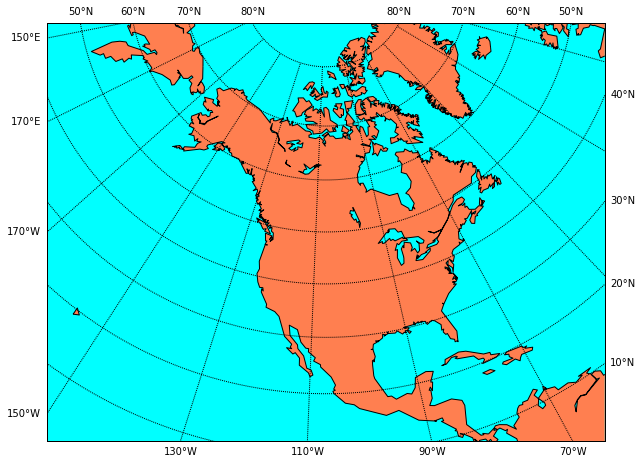

In [25]:
# draw parallels and meridians
# label parallels on right and top, meridians on bottom and left
m = Basemap(projection='lcc',resolution='c', lon_0=-107, lat_0=50, width=12000000,height=9000000)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')
parallels = np.arange(0.,81,10.)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

 parallels and meridians are defined by a one-dimensional array [start end step].
 The longitude and latitude lines can be labelled where they intersect the map projection boundary. 

### Converting to and from map projection coordinates

Text(6338186.703792961, 3501127.453456264, 'Boulder (-104.2W,40.1N)')

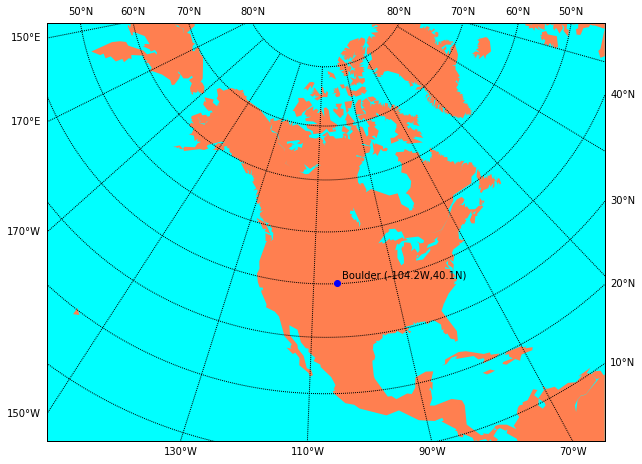

In [26]:
m = Basemap(projection='lcc',resolution='c', lon_0=-107, lat_0=50, width=12000000,height=9000000)
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')
parallels = np.arange(0.,81,10.)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# convert a point on Boulder, coloradoto to map projection coords and plot it
lon, lat = -104.237, 40.125
xpt,ypt = m(lon,lat)
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'bo')
plt.text(xpt+100000,ypt+100000,'Boulder (%5.1fW,%3.1fN)' % (lonpt,latpt))

### Plotting data on a map

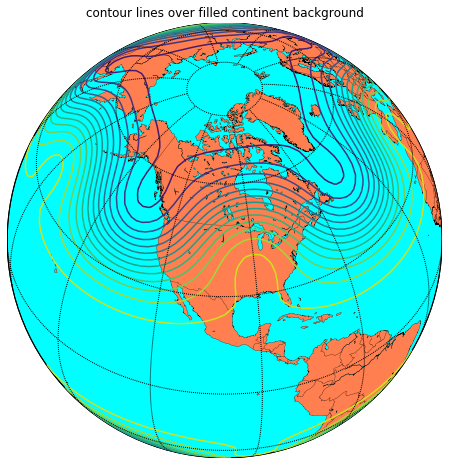

In [27]:
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

### Read and plot shapefile

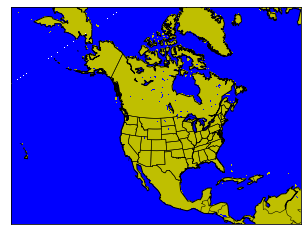

In [9]:
m = Basemap(projection='lcc',lon_0=-107,lat_0=50,width=12000000,height=9000000)
m.drawcountries()
m.drawcoastlines()
m.drawlsmask(land_color='y',ocean_color='b') 
m.readshapefile(shapefile="states_21basic/states",name='states')
plt.show()